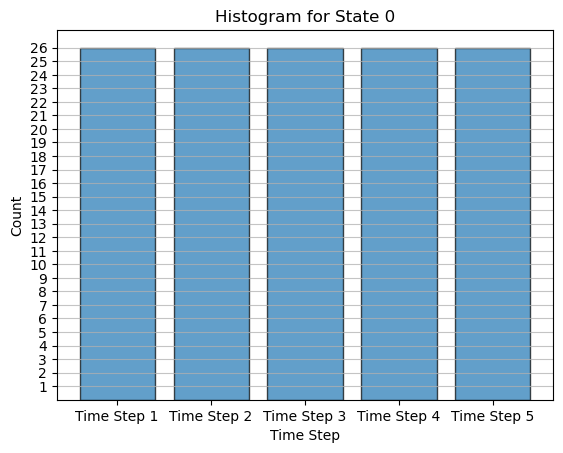

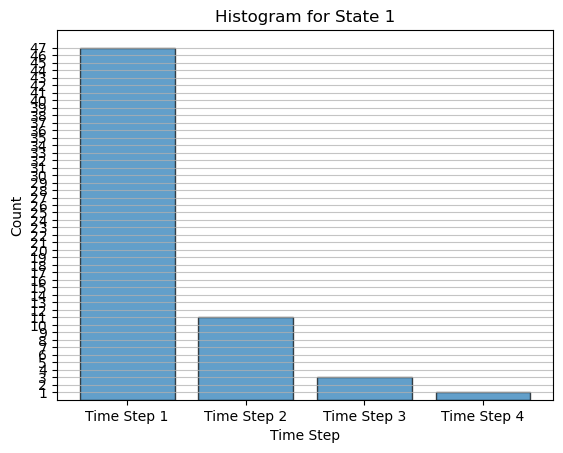

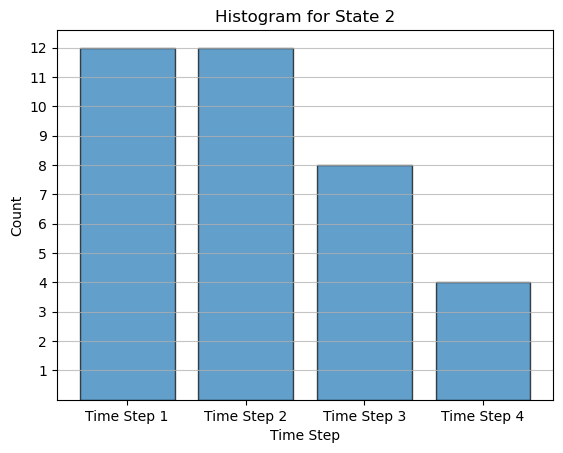

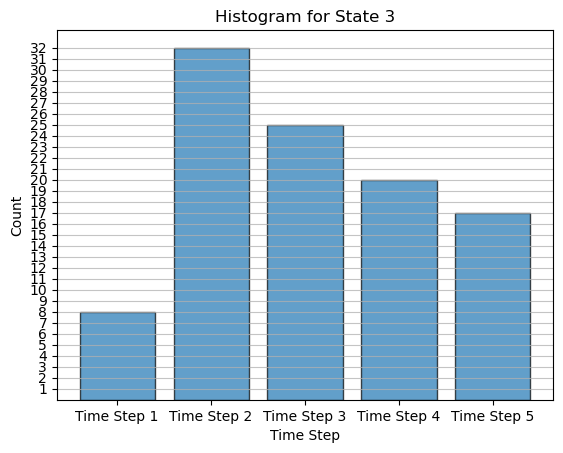

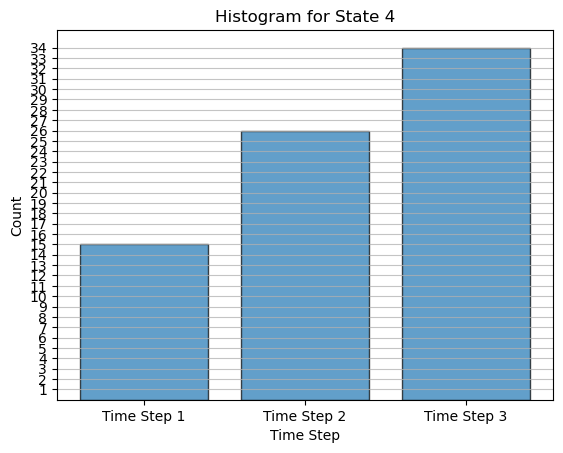

In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Read the data from the text file
with open('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Bin/Test_COVID_CAcellState_output.txt', 'r') as f:
    lines = f.readlines()

# Process the data
data = defaultdict(list)
for line in lines[1:]:  # Skip the header
    pairs = line.split()
    for pair in pairs:
        state, count = map(int, pair.split(','))
        data[state].append(count)

# Create a histogram for each state
for state in range(5):  # Loop over states 0-4
    counts = data[state]
    if counts:  # Check if the list of counts is not empty
        plt.figure()
        plt.bar(range(1, len(counts) + 1), counts, alpha=0.7, edgecolor='black')
        plt.title(f'Histogram for State {state}')
        plt.xticks(range(1, len(counts) + 1), labels=[f'Time Step {i}' for i in range(1, len(counts) + 1)])
        plt.yticks(range(1, max(counts) + 1))
        plt.xlabel('Time Step')
        plt.ylabel('Count')
        plt.grid(axis='y', alpha=0.75)
        plt.show()


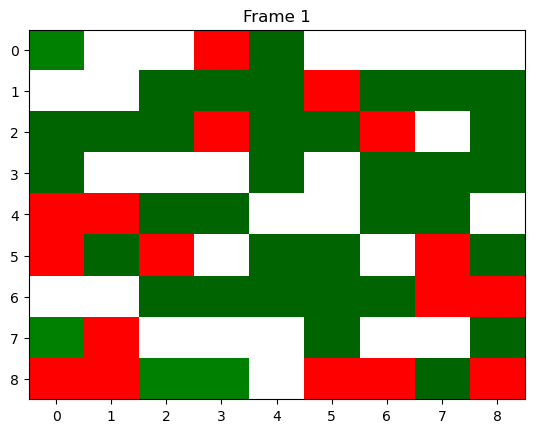

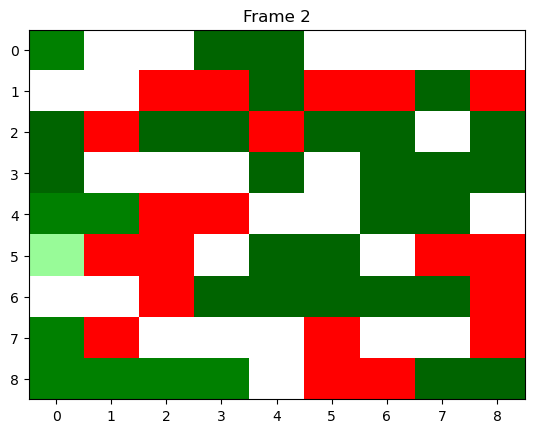

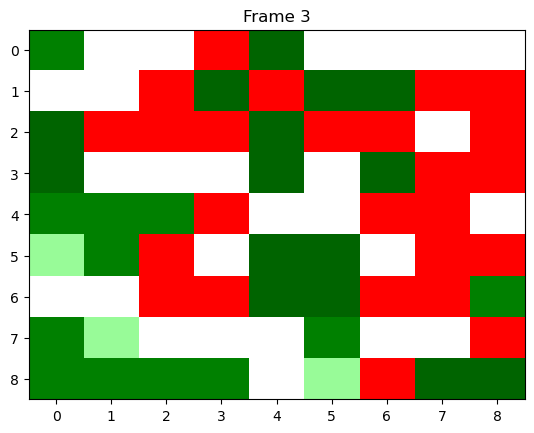

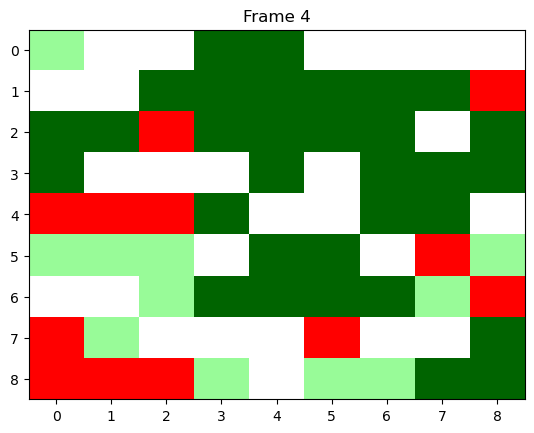

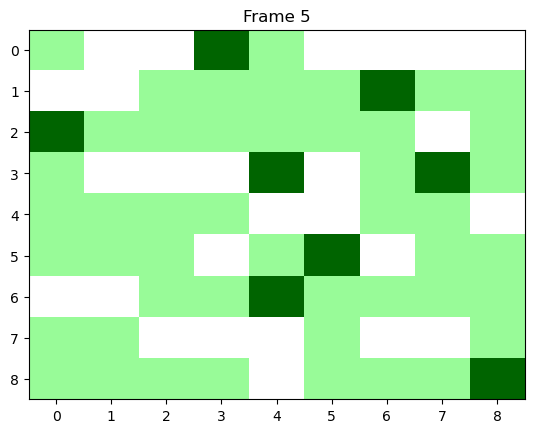

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Define the color map
colors = ['white', 'palegreen', 'green', 'red', 'darkgreen']
cmap = ListedColormap(colors)

# Read the data from the text file
with open('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Bin/Test_COVID_CAframe_output.txt', 'r') as f:
    lines = f.readlines()

# Process the data and reverse the order of frames
frames = []
for line in lines[1:]:  # Skip the header
    frame = list(map(int, line.split()))
    frames.insert(0, frame)  # Insert frames at the beginning of the list

# Create a grid visual for each frame
for i, frame in enumerate(frames):
    grid = np.array(frame).reshape(9, 9)  # Reshape the frame into a 9x9 grid
    plt.figure()
    plt.imshow(grid, cmap=cmap, aspect='auto')  # Use the color map
    plt.title(f'Frame {i + 1}')
    plt.show()


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from PIL import Image

# Define the color map
colors = ['white', 'palegreen', 'green', 'red', 'darkgreen']
cmap = ListedColormap(colors)

# Read the data from the text file
with open('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Bin/Test_COVID_CAframe_output.txt', 'r') as f:
    lines = f.readlines()

# Process the data and reverse the order of frames
frames = []
for line in lines[1:]:  # Skip the header
    frame = list(map(int, line.split()))
    frames.insert(0, frame)  # Insert frames at the beginning of the list

# Create a list to store PIL Images
images = []

# Create a grid visual for each frame and save as an image
for i, frame in enumerate(frames):
    grid = np.array(frame).reshape(9, 9)  # Reshape the frame into a 9x9 grid
    plt.figure()
    plt.imshow(grid, cmap=cmap, aspect='auto')  # Use the color map
    plt.title(f'Frame {i + 1}')
    plt.axis('off')  # Turn off axis labels
    plt.close()  # Close the current figure to prevent displaying it

    # Save the figure as an image
    img_path = f'frame_{i + 1}.png'
    plt.savefig(img_path)
    images.append(Image.open(img_path))

# Save the images as a GIF
gif_path = '/home/radhikasahai/chem_274B/Chem274B_Final_Project/Bin/animation.gif'
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)


<Figure size 640x480 with 0 Axes>